<a href="https://colab.research.google.com/github/gusmarlaj/Machine_Learning_Ideas/blob/master/Detect_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Detecting Pneumonia from Chest X-rays**

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

CNN architectures:

The Image Classification Tasks is possible to be analyzed using **Deep Neural Networks** such as:

-CNNs

-VGG16 (Visual Geometry Group)

-MobileNet

-DenseNet

-Inception (GoogLeNet)

-ResNet





## Import data

In [1]:
# Data hosted at below link (downloading it)
!wget https://www.dropbox.com/s/tlxserrdhe240lu/archive.zip
# Unzipping the data
!unzip -q "archive.zip"

--2024-02-21 23:45:49--  https://www.dropbox.com/s/tlxserrdhe240lu/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/tlxserrdhe240lu/archive.zip [following]
--2024-02-21 23:45:49--  https://www.dropbox.com/s/raw/tlxserrdhe240lu/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2aa993d40d002157c97fb73ec5.dl.dropboxusercontent.com/cd/0/inline/CNsYwhQ7bDnOK0l5mXjQXYMW9rdW_OulX04ooZ0jJigc4bVtqF-a_B4LrdesA_oC353KzxL4mvM3Lng-cLj2-UFaRahWjzpElmrRGRRO4YpuX69oL1t-tqK2saQe1tJhXG4Hzozfupm4dmmNVJKfNRvN/file# [following]
--2024-02-21 23:45:49--  https://uc2aa993d40d002157c97fb73ec5.dl.dropboxusercontent.com/cd/0/inline/CNsYwhQ7bDnOK0l5mXjQXYMW9rdW_OulX04ooZ0jJigc4bVtqF-a_B4LrdesA_oC353KzxL4mvM3Lng-cLj2-UFaRahWjzpElmrRGRRO4

## Library Setup

In [20]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Class weight calculation
from sklearn.utils.class_weight import compute_class_weight

# Keras library
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Different CNN Model
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121

# To chain two different data augmented images for training
from itertools import chain

#  Distributed Computing
import tensorflow as tf



In [3]:
BATCH_SIZE = 48

image_height = 299
image_width = 299

# Image Augmentation:

Image augmentation is a technique used in convolutional neural networks (CNNs) to artificially increase the size of the training dataset by applying various transformations to the original images. It is primarily used to prevent overfitting and improve the generalization capability of CNN models.

By applying these transformations, the augmented images have variations in their appearance, while still retaining the essential features of the original images. This helps the model generalize better to unseen data and reduces the risk of overfitting.

In [4]:
# Data agumentation and pre-processing using tensorflow
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'
                        )

print('Data Augmentation 1 was created')

data_generator_2 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            brightness_range = [0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'
                        )
print('Data Augmentation 2 was created')

data_generator_3 = ImageDataGenerator (rescale=1./255)



Data Augmentation 1 was created
Data Augmentation 2 was created


In [5]:
train_generator1 = data_generator_1.flow_from_directory(
    directory = "/content/chest_xray/train", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)

print('Data Augmentation 1 was used to generate train data set\n')

# train_generator2 = data_generator_2.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

# print('Data Augmentation 2 was used to generate train data set\n')

# train_generator3 = data_generator_3.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

# print('Original images was used to generate train data set\n')

test_generator = data_generator_3.flow_from_directory(
    directory = "/content/chest_xray/test", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)


# val_generator = data_generator_3.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/val", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

Found 5216 images belonging to 2 classes.
Data Augmentation 1 was used to generate train data set

Found 624 images belonging to 2 classes.


## **EDA**

Distribution of Class Label:

To identify if the dataset suffers from class imbalance, where the number of instances in different classes is significantly different. Class imbalance can lead to biased learning and poor performance, especially for the minority class.

In [6]:
dict_class = train_generator1.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


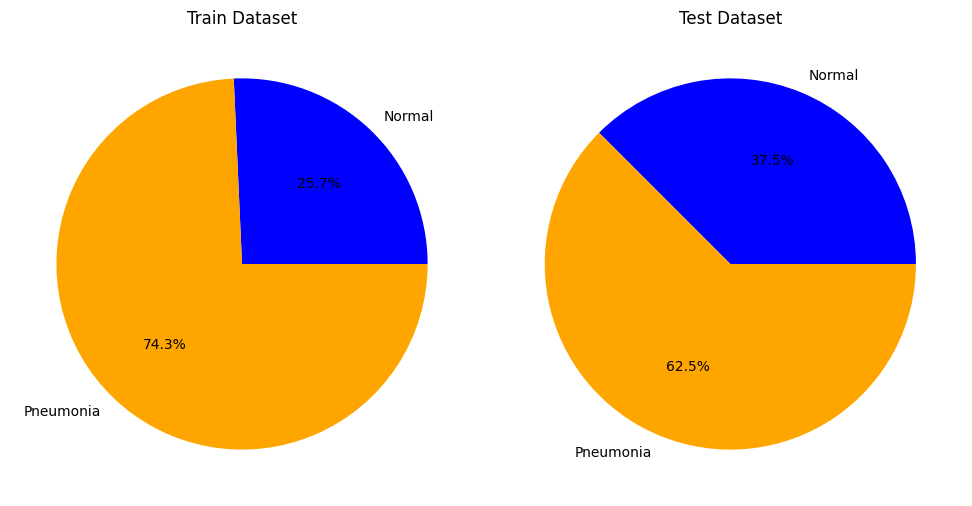

In [13]:
# Pie chart for train dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
labels = ['Normal', 'Pneumonia']
sizes = [train_normal, train_pneumonia]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Train Dataset')

# Pie chart for test dataset
plt.subplot(1, 2, 2)
sizes = [test_normal, test_pneumonia]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Test Dataset')

plt.tight_layout()
plt.show()

In [8]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator1.classes))
print("Number of normal images:", len([label for label in train_generator1.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in train_generator1.classes if label == 1]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_generator.classes))
print("Number of normal images:", len([label for label in test_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in test_generator.classes if label == 1]))
print()

Dataset Characteristics of Train Data Set:
Number of images: 5216
Number of normal images: 1341
Number of pneumonia images: 3875

Dataset Characteristics of Test Data Set:
Number of images: 624
Number of normal images: 234
Number of pneumonia images: 390



More visualizations

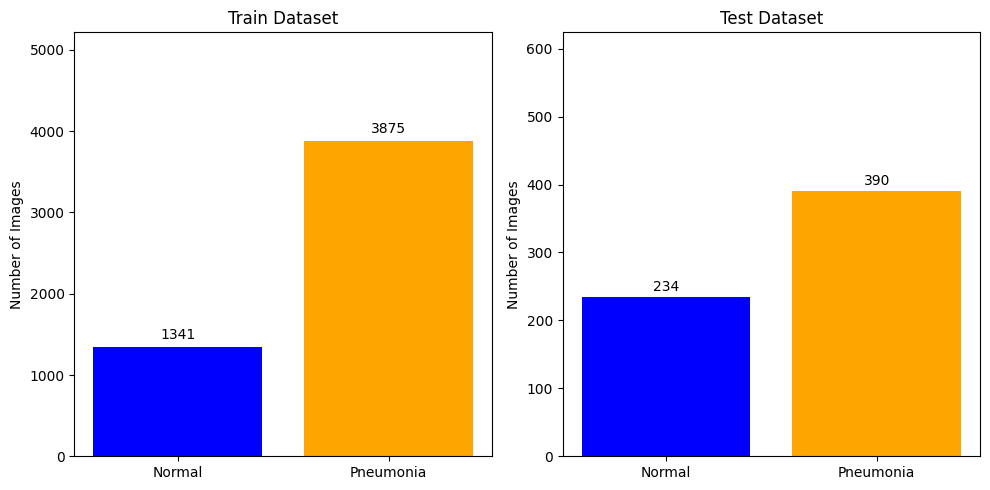

In [15]:
import matplotlib.pyplot as plt

# Dataset characteristics
train_total = len(train_generator1.classes)
train_normal = len([label for label in train_generator1.classes if label == 0])
train_pneumonia = len([label for label in train_generator1.classes if label == 1])

test_total = len(test_generator.classes)
test_normal = len([label for label in test_generator.classes if label == 0])
test_pneumonia = len([label for label in test_generator.classes if label == 1])

# Creating lists for labels and values
labels = ['Normal', 'Pneumonia']
train_counts = [train_normal, train_pneumonia]
test_counts = [test_normal, test_pneumonia]

# Plotting train data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, train_counts, color=['blue', 'orange'])
plt.title('Train Dataset')
plt.ylabel('Number of Images')
plt.ylim(0, train_total)  # Adjust ylim for better visualization
for i, count in enumerate(train_counts):
    plt.text(i, count + 100, str(count), ha='center')

# Plotting test data
plt.subplot(1, 2, 2)
plt.bar(labels, test_counts, color=['blue', 'orange'])
plt.title('Test Dataset')
plt.ylabel('Number of Images')
plt.ylim(0, test_total)  # Adjust ylim for better visualization
for i, count in enumerate(test_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.tight_layout()
plt.show()

Correcting imbalanced classes in a dataset is crucial for training models that can generalize well across all classes. Here are several methods commonly used to address class imbalance:

1. Resampling Techniques:
        Over-sampling: Increase the number of instances in the minority class by generating synthetic samples or duplicating existing ones.
            Random oversampling
            Synthetic Minority Over-sampling Technique (SMOTE)
        Under-sampling: Decrease the number of instances in the majority class by randomly removing samples.
            Random undersampling
            Tomek links
            Edited Nearest Neighbors (ENN)

2. Algorithmic Techniques:
        Cost-sensitive learning: Assign different misclassification costs to different classes, penalizing misclassifying the minority class more heavily.
        Algorithmic ensemble methods: Use ensemble techniques that inherently handle class imbalance, such as:
            Balanced Random Forest
            EasyEnsemble
            Balanced Bagging

3. Data Augmentation: Generate new samples for the minority class by applying transformations like rotation, translation, flipping, or adding noise.

4. Anomaly Detection Techniques: Treat the minority class as anomalies and use anomaly detection methods to identify them. Examples include One-Class SVM or isolation forests.

5. Generate Synthetic Data: Create synthetic samples for the minority class using generative models like Variational Autoencoders (VAEs) or Generative Adversarial Networks (GANs).

6. Class Weights: Assign different weights to different classes during training to account for class imbalance. Misclassifications of the minority class are penalized more heavily than misclassifications of the majority class.

7. Cost-sensitive Learning: Modify the algorithms to be sensitive to misclassification costs. For example, in SVMs, adjust the penalty parameter (C) to give more weight to minority class samples.

8. Evaluation Metrics: Use evaluation metrics that are less sensitive to class imbalance, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC).

9. Data Preprocessing: Perform preprocessing techniques that can mitigate class imbalance without changing the class distribution, such as:
        Feature selection/extraction
        Outlier removal
        Normalization/standardization

10. Ensemble Methods: Utilize ensemble techniques by training multiple models on balanced subsets of the data and combining their predictions.

**Class Weights**

The purpose of class weights is to address class imbalance in the dataset during training. The weights are used to adjust the contribution of each class to the overall loss function and gradient calculation during backpropagation. By assigning higher weights to the minority class and lower weights to the majority class, the model gives more importance to correctly classifying instances from the minority class.

In [16]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator1.classes), y= train_generator1.classes)
class_weights = dict(zip(np.unique(train_generator1.classes), class_weights))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

Image Samples

Train image data from Data Augmentation 1


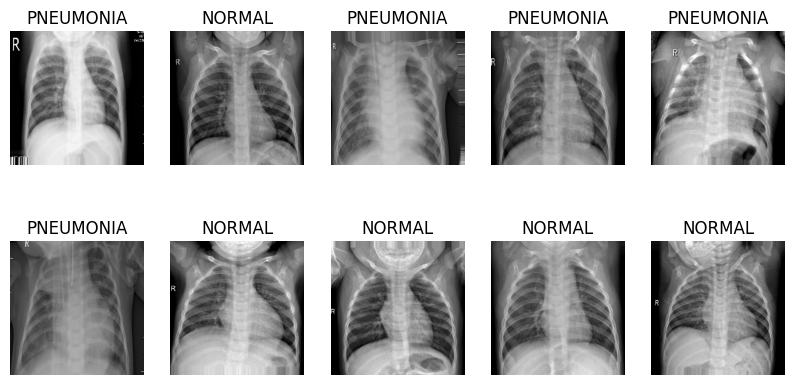

In [17]:
print('Train image data from Data Augmentation 1')
img, label = next(train_generator1)
# print(len(label))

plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])
plt.show()

# print('Train image data from Data Augmentation 2')
# img, label = next(train_generator2)

# plt.figure(figsize=[10, 4])
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.title(class_names[np.argmax(label[i])])
# plt.show()

# print('Train image data from Original Image')
# img, label = next(train_generator3)

# plt.figure(figsize=[10, 4])
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.title(class_names[np.argmax(label[i])])
# plt.show()

## Model 1: Convolutional neural networks (CNNs)

CNN (Convolutional Neural Network) model is a type of deep learning model commonly used for processing and analyzing visual data, such as images. It is particularly effective in tasks such as image classification, object detection, and image segmentation. They consist of multiple interconnected layers that learn to extract and represent hierarchical patterns and features from input images.

In [18]:
# Define the epochs for training
EPOCHS = 2

# Define the number of GPUs to use
num_gpus = 2

# Merge augmented image data for training
# merged_train_generator = chain(train_generator1, train_generator2, train_generator3)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, restore_best_weights=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=10, verbose=1)

# For development purpose, we first limit the train data set to the original image data set
# train_data = merged_train_generator
# train_data = train_generator1
train_data = train_generator1
# train_data = test_generator

# Model 2: VGG16

The VGG16 architecture consists of 16 convolutional layers with small 3x3 filters followed by max pooling layers. It is a very simple, effective CNN model for image classification tasks. It is a widely-used baseline for comparison benchmarkingin various image classification tasks.

In [ ]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained VGG16 model without the top classification layer
    base_model_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_VGG16.layers:
        layer.trainable = False

    # Create a new model and add the VGG16 base model
    model_VGG16 = Sequential()
    model_VGG16.add(base_model_VGG16)

    # Add a fully connected layer and output layer for classification
    model_VGG16.add(GlobalAveragePooling2D())
    model_VGG16.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_VGG16.add(Dropout(0.4))
    model_VGG16.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_VGG16.add(Dropout(0.2))
    model_VGG16.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (VGG16):")
    model_VGG16.summary()
    print()

    # Compile the model
    model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_VGG16 = model_VGG16.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_VGG16, val_accuracy_VGG16 = model_VGG16.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_VGG16:.4f}')

# Model 3: MobileNetV2

The MobileNetV2 architecture is designed for efficient inference on mobile and embedded devices. It uses depthwise separable convolutions to reduce the number of parameters and computations. MobileNetV2 offers a good balance between accuracy and computational efficiency.

In [ ]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained MobileNetV2 model without the top classification layer
    base_model_MobileNet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_MobileNet.layers:
        layer.trainable = False

    # Create a new model and add the MobileNetV2 base model
    model_MobileNet = Sequential()
    model_MobileNet.add(base_model_MobileNet)

    # Add a global average pooling layer and output layer for classification
    model_MobileNet.add(GlobalAveragePooling2D())
    model_MobileNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_MobileNet.add(Dropout(0.4))
    model_MobileNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_MobileNet.add(Dropout(0.2))
    model_MobileNet.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (MobileNetV2):")
    model_MobileNet.summary()
    print()

    # Compile the model
    model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_MobileNet = model_MobileNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_MobileNet, val_accuracy_MobileNet = model_MobileNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_MobileNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_MobileNet:.4f}')

# Model 4: DenseNet

The DenseNet architecture introduces dense connections, where each layer is connected to every other layer in a feed-forward manner. Dense connections facilitate feature reuse, promote gradient flow, and alleviate the vanishing gradient problem. DenseNet has achieved competitive results on image classification tasks and is known for its parameter efficiency.

In [ ]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained DenseNet121 model without the top classification layer
    base_model_DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_DenseNet.layers:
        layer.trainable = False

    # Create a new model and add the DenseNet121 base model
    model_DenseNet = Sequential()
    model_DenseNet.add(base_model_DenseNet)

    # Add a global average pooling layer and output layer for classification
    model_DenseNet.add(GlobalAveragePooling2D())
    model_DenseNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_DenseNet.add(Dropout(0.4))
    model_DenseNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_DenseNet.add(Dropout(0.2))
    model_DenseNet.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (DenseNet121):")
    model_DenseNet.summary()
    print()

    # Compile the model
    model_DenseNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_DenseNet = model_DenseNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_DenseNet, val_accuracy_DenseNet = model_DenseNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_DenseNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_DenseNet:.4f}')


# Model 5: InceptionV3

The InceptionV3 architecture utilizes a combination of convolutional layers with different filter sizes to capture features at multiple scales. It includes the Inception module, which performs parallel convolutions with different filter sizes and concatenates their outputs. InceptionV3 has shown strong performance on image classification tasks, especially for complex datasets.

In [ ]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained InceptionV3 model without the top classification layer
    base_model_Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_Inception.layers:
        layer.trainable = False

    # Create a new model and add the InceptionV3 base model
    model_Inception = Sequential()
    model_Inception.add(base_model_Inception)

    # Add a global average pooling layer and output layer for classification
    model_Inception.add(GlobalAveragePooling2D())
    model_Inception.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_Inception.add(Dropout(0.4))
    model_Inception.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_Inception.add(Dropout(0.2))

    model_Inception.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (InceptionV3):")
    model_Inception.summary()
    print()

    # Compile the model
    model_Inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with EarlyStopping
    history_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_Inception, val_accuracy_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_Inception:.4f}')
    print(f'Validation Accuracy: {val_accuracy_Inception:.4f}')

## Model 6: ResNet50

In [ ]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained ResNet50 model without the top classification layer
    base_model_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_ResNet50.layers:
        layer.trainable = False

    # Create a new model and add the ResNet50 base model
    model_ResNet50 = Sequential()
    model_ResNet50.add(base_model_ResNet50)

    # Add a fully connected layer and output layer for classification
    model_ResNet50.add(GlobalAveragePooling2D())
    model_ResNet50.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_ResNet50.add(Dropout(0.4))
    model_ResNet50.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_ResNet50.add(Dropout(0.2))
    model_ResNet50.add(Dense(2, activation='softmax'))
    #tf.keras.layers.Dense(1, activation='sigmoid')

    # Model summary
    print("Model Summary (ResNet50):")
    model_ResNet50.summary()
    print()

    # Compile the model
    model_ResNet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_ResNet50 = model_ResNet50.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_ResNet50, val_accuracy_ResNet50 = model_ResNet50.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_ResNet50:.4f}')
    print(f'Validation Accuracy: {val_accuracy_ResNet50:.4f}')

94765736/94765736 [==============================] - 1s 0us/step
Model Summary (ResNet50):
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         

## Model Performance Comparison

In [ ]:
data = {
    'VGG16': val_accuracy_VGG16,
    'MobileNet': val_accuracy_MobileNet,
    'DenseNet': val_accuracy_DenseNet,
    'Inception': val_accuracy_Inception
}


In [ ]:
# #data2 = {
#     'VGG16': val_accuracy_VGG16,
#     'MobileNet': val_accuracy_MobileNet,
#     'DenseNet': val_accuracy_DenseNet,
#     'Inception': val_accuracy_Inception
#     'ResNet50': val_accuracy_ResNet50
# }

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})



In [ ]:
# df2 = pd.DataFrame.from_dict(data2, orient='index', columns=['accuracy'])
# df2 = df.reset_index().rename(columns={'index': 'model'})


In [ ]:
# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()

plt.show()

In [ ]:
# Create bar chart ResNet50
sns.barplot(x='model', y='accuracy', data=df2)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()

plt.show()

Observation and findings: When constructing each CNN architecture, we added the same number of layers to the base model and used identical regularization and dropout techniques to prevent overfitting. Our results demonstrate that Inception outperformed the other CNN architectures tested. We believe that fine-tuning the trainable layers will further enhance their performance.

# Fine-tune Modelling

Fine-tuning involves taking the pre-trained CNN model and adapting it to a new task or domain using a smaller labeled dataset specific to the target task. The fine-tuning process involves updating the weights of the pre-trained model using backpropagation and gradient descent. The learning rate may be adjusted during fine-tuning to control the rate at which the model adapts to the target task. This approach can help overcome the limitations of limited labeled data and improve the performance of the model on the target task.

In [ ]:
# Fine-tune the model with frozen layers

# Unfreeze the base_model
no_base_layers = len(model_Inception.layers)
print('No. of base layers in the model = {}\n'.format(no_base_layers))

# no of layers for fine-tune
no_finetune_layers = int(no_base_layers/2)
print('No. of layers for fine-tune = {}'.format(no_finetune_layers))

In [ ]:
# Fine-tune the model
model_Inception.trainable = True
for layer in model_Inception.layers[: -no_finetune_layers]:
    layer.trainable = False

# small learning rate for fine tuning
model_Inception.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping])

In [ ]:
# Validate the model
print('====== Model Validation ======')
val_loss_finetune_Inception, val_accuracy_finetune_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_finetune_Inception:.4f}')
print(f'Validation Accuracy: {val_accuracy_finetune_Inception:.4f}')

## Prediction Result Samples

In [ ]:
test_generator.reset()
img, label = next(test_generator)

prediction = model_Inception.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()

**References**

Benny Fung - "Detecting Pneumonia from Chest X-rays". In Kaggle's Competition.